In [58]:
library(dplyr)
library(rio) #great for exporting, importing
library (stringr)
library(cowplot)
library(tidyr)
library(ggpubr)

library(readxl)
library(patchwork)
library(RColorBrewer)
library(viridis)
library(ggvenn)

## Tissue specific expression from the Atlantic Developmental Gene Expression Atlast

Data was rlog normalized using DEseq using only the Tissue samples. It did not include the Stress expression set or the timecourse samples. 

In [2]:
# Tissue specific expression from Julia
#:::::::::::::::::::::::::::::::::::
Tissues<- import(file = '~/Dropbox/Potato/RNA-seq_2/RNAseq_analysis/Data/DEseq/Julia_Data/tissues_without_tc_outfile.csv',
                                sep =',', header = TRUE, fill = TRUE )

In [3]:
Tissues[1:2,]

,V1,TuberS4_R1_ATL_AN,TuberS4_R2_ATL_AO,TuberS4_R3_ATL_AP,TuberS3_R1_ATL_AQ,TuberS3_R2_ATL_AR,TuberS3_R3_ATL_AS,TuberS1_R1_ATL_AW,TuberS1_R2_ATL_AX,TuberS1_R3_ATL_AY,⋯,TuberS5_R1_ATL_AK,TuberS5_R2_ATL_AL,TuberS5_R3_ATL_AM,TuberS2_R2_ATL_AU,TuberS2_R3_ATL_AV,OpenFlower_R2_ATL_CE,StemControl_R1_ATL_CX,ColdLeafControl_R1_ATL_DG,ColdLeafControl_R3_ATL_DI,RootControl_R1_ATL_EB
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Soltu.Atl_v3.09_0G012740.1,-1.150968,0.04301417,-0.8950817,-1.236144,-1.23256,-1.225649,-1.277885,0.5096579,-0.05929033,⋯,-1.037691,-1.095777,0.5993646,0.482347,-1.107616,1.675304,1.515202,-0.8991277,-0.889735,5.318072
2,Soltu.Atl_v3.10_2G013020.1,-1.881905,-1.86632902,-1.8337444,-1.900255,-1.89887,-1.896208,-1.916686,-1.6341077,-1.88348821,⋯,-1.860585,-1.871518,-1.8686471,-1.885423,-1.873746,-1.781673,-1.890906,-1.8345059,-1.832738,-1.406416


In [4]:
colnames(Tissues)

[1] "V1"                        "TuberS4_R1_ATL_AN"        
 [3] "TuberS4_R2_ATL_AO"         "TuberS4_R3_ATL_AP"        
 [5] "TuberS3_R1_ATL_AQ"         "TuberS3_R2_ATL_AR"        
 [7] "TuberS3_R3_ATL_AS"         "TuberS1_R1_ATL_AW"        
 [9] "TuberS1_R2_ATL_AX"         "TuberS1_R3_ATL_AY"        
[11] "SwollenStolon_R1_ATL_AZ"   "SwollenStolon_R2_ATL_BA"  
[13] "SwollenStolon_R3_ATL_BB"   "HookedStolon_R1_ATL_BC"   
[15] "HookedStolon_R2_ATL_BD"    "HookedStolon_R3_ATL_BE"   
[17] "YL10am_R1_ATL_BI"          "YL10am_R2_ATL_BJ"         
[19] "YL10am_R3_ATL_BK"          "ClosedFlower_R1_ATL_CA"   
[21] "ClosedFlower_R2_ATL_CB"    "ClosedFlower_R3_ATL_CC"   
[23] "OpenFlower_R1_ATL_CD"      "OpenFlower_R3_ATL_CF"     
[25] "Sprout_R1_ATL_CG"          "Sprout_R2_ATL_CH"         
[27] "StemControl_R2_ATL_CY"     "StemControl_R3_ATL_CZ"    
[29] "ColdLeafControl_R2_ATL_DH" "ImmFruit_R1_ATL_DM"       
[31] "ImmFruit_R2_ATL_DN"        "ImmFruit_R3_ATL_DO"       
[33] "RootControl_R2_ATL_EC"     "RootControl_R3_ATL_ED"    
[35] "MatureFruit_R1_ATL_EE"     "MatureFruit_R2_ATL_EF"    
[37] "MatureFruit_R3_ATL_EG"     "TuberS2_R1_ATL_EP"        
[39] "TuberS5_R1_ATL_AK"         "TuberS5_R2_ATL_AL"        
[41] "TuberS5_R3_ATL_AM"         "TuberS2_R2_ATL_AU"        
[43] "TuberS2_R3_ATL_AV"         "OpenFlower_R2_ATL_CE"     
[45] "StemControl_R1_ATL_CX"     "ColdLeafControl_R1_ATL_DG"
[47] "ColdLeafControl_R3_ATL_DI" "RootControl_R1_ATL_EB"

In [5]:
length(colnames(Tissues))

[1] 48

In [6]:
Short_col_names <- colnames(Tissues) %>% str_sub(, end=-8)
Short_col_names

[1] ""                   "TuberS4_R1"         "TuberS4_R2"        
 [4] "TuberS4_R3"         "TuberS3_R1"         "TuberS3_R2"        
 [7] "TuberS3_R3"         "TuberS1_R1"         "TuberS1_R2"        
[10] "TuberS1_R3"         "SwollenStolon_R1"   "SwollenStolon_R2"  
[13] "SwollenStolon_R3"   "HookedStolon_R1"    "HookedStolon_R2"   
[16] "HookedStolon_R3"    "YL10am_R1"          "YL10am_R2"         
[19] "YL10am_R3"          "ClosedFlower_R1"    "ClosedFlower_R2"   
[22] "ClosedFlower_R3"    "OpenFlower_R1"      "OpenFlower_R3"     
[25] "Sprout_R1"          "Sprout_R2"          "StemControl_R2"    
[28] "StemControl_R3"     "ColdLeafControl_R2" "ImmFruit_R1"       
[31] "ImmFruit_R2"        "ImmFruit_R3"        "RootControl_R2"    
[34] "RootControl_R3"     "MatureFruit_R1"     "MatureFruit_R2"    
[37] "MatureFruit_R3"     "TuberS2_R1"         "TuberS5_R1"        
[40] "TuberS5_R2"         "TuberS5_R3"         "TuberS2_R2"        
[43] "TuberS2_R3"         "OpenFlower_R2"      "StemControl_R1"    
[46] "ColdLeafControl_R1" "ColdLeafControl_R3" "RootControl_R1"

In [7]:
Short_col_names[1] <- 'geneID'

In [8]:
colnames(Tissues) <- Short_col_names

In [9]:
Tissues[1:2,]

,geneID,TuberS4_R1,TuberS4_R2,TuberS4_R3,TuberS3_R1,TuberS3_R2,TuberS3_R3,TuberS1_R1,TuberS1_R2,TuberS1_R3,⋯,TuberS5_R1,TuberS5_R2,TuberS5_R3,TuberS2_R2,TuberS2_R3,OpenFlower_R2,StemControl_R1,ColdLeafControl_R1,ColdLeafControl_R3,RootControl_R1
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Soltu.Atl_v3.09_0G012740.1,-1.150968,0.04301417,-0.8950817,-1.236144,-1.23256,-1.225649,-1.277885,0.5096579,-0.05929033,⋯,-1.037691,-1.095777,0.5993646,0.482347,-1.107616,1.675304,1.515202,-0.8991277,-0.889735,5.318072
2,Soltu.Atl_v3.10_2G013020.1,-1.881905,-1.86632902,-1.8337444,-1.900255,-1.89887,-1.896208,-1.916686,-1.6341077,-1.88348821,⋯,-1.860585,-1.871518,-1.8686471,-1.885423,-1.873746,-1.781673,-1.890906,-1.8345059,-1.832738,-1.406416


In [10]:
Tissues_long <- Tissues %>% pivot_longer(!geneID, names_to = 'Tissue', values_to = 'rlog')

In [11]:
Tissues_long[1:2,]

geneID,Tissue,rlog
<chr>,<chr>,<dbl>
Soltu.Atl_v3.09_0G012740.1,TuberS4_R1,-1.15096827
Soltu.Atl_v3.09_0G012740.1,TuberS4_R2,0.04301417


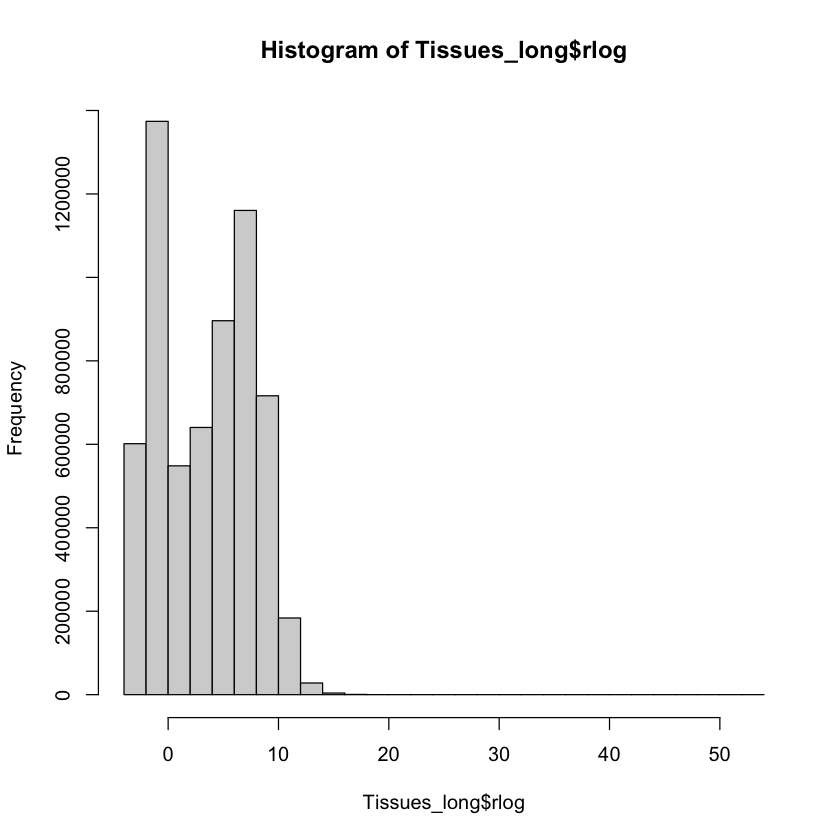

In [12]:
hist(Tissues_long$rlog)

In [13]:
Tissues_long %>% filter(rlog<0) %>% nrow()
Tissues_long %>% filter(rlog>=0) %>% nrow()

[1] 1788163

[1] 4365406

In [14]:
#### Separate replicates
#::::::::::::::::::::::::

Tissues_long <- Tissues_long %>% separate_wider_delim(Tissue, '_', names = c('Tissue', 'Replicate'))
Tissues_long[1:2,]

geneID,Tissue,Replicate,rlog
<chr>,<chr>,<chr>,<dbl>
Soltu.Atl_v3.09_0G012740.1,TuberS4,R1,-1.15096827
Soltu.Atl_v3.09_0G012740.1,TuberS4,R2,0.04301417


In [15]:
# How many different samples are in our dataset?
#::::::::::::::::::::::::::::::::::::::::::::::::
Tissues_long %>% select(Tissue) %>% unique() %>% nrow()

[1] 16

## Calculate average expression per sample type

In [16]:
Tissues_long_av <- Tissues_long %>% group_by(geneID, Tissue) %>%
                    summarize(rlog_mean = mean(rlog), .groups='drop')

In [17]:
Tissues_long_av[1:2,]

geneID,Tissue,rlog_mean
<chr>,<chr>,<dbl>
Soltu.Atl_v3.01_0G000010.1,ClosedFlower,1.52559678
Soltu.Atl_v3.01_0G000010.1,ColdLeafControl,0.07708519


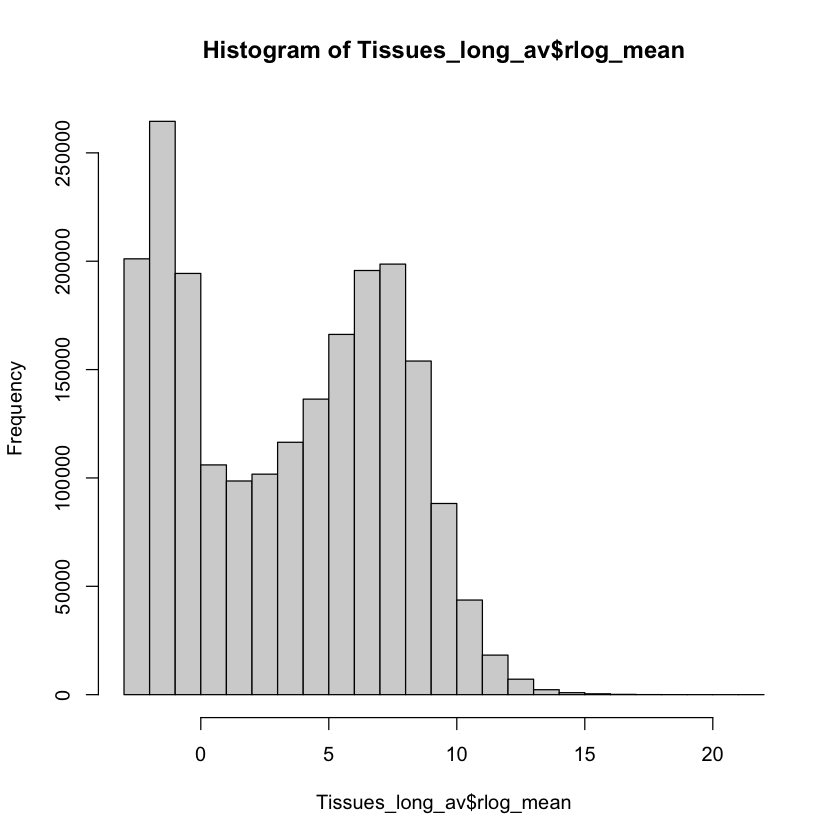

In [18]:
hist(Tissues_long_av$rlog_mean)

# Calculating the Tau value for Tissue specificity

This study indicates that Tau is a good parameter to estimate tissue specific expression:https://academic.oup.com/bib/article/18/2/205/2562739


Original Tau analysis reference:
Yanai, I. et al. Genome-wide midrange transcription profiles reveal expression level relationships in human tissue specification. Bioinformatics 21, 650–659 (2005).

Other papers: 
https://biodatamining.biomedcentral.com/articles/10.1186/s13040-022-00315-9

https://www.nature.com/articles/s42003-024-06421-0#Sec11


### Calculating Tau
We are following the method described here: https://academic.oup.com/bib/article/18/2/205/2562739. 
The method does not allow for negative number for expression and that you need a cut of to determine what you call 'not expressed'.  In this reference the clean up low expression as follows:
"All the genes with expression <1 RPKM were set as not expressed. The RNA-seq data were first log-transformed. After the normalization, a mean value from all replicates for each tissue separately was calculated. All genes that were not expressed in at least one tissue were removed from the analysis."

For our analysis, we use the same cut off as for the rhythmic analyses:

1. Remove not expressed genes, eg for our case the maximum rlog across tissues has to be larger than 0. 

2. I interpret "all the genes with expression <1 RPKM were set as not expressed" as that the expression was set to 0. Therefore for all our expressed genes, we set rlog values < 0 to 0. 

### Remove all not expressed genes

In [19]:
Tissues_long_av_expr <- Tissues_long_av %>% group_by(geneID) %>%
                    filter(max(rlog_mean) > 0) %>% ungroup()

In [20]:
print('This is the initial number of genes in our dataset')
Tissues_long_av %>% select(geneID) %>% unique() %>% nrow()
print('This is the number of expressed genes in our dataset')
Tissues_long_av_expr%>% select(geneID) %>% unique() %>% nrow()

print('There are this many genes not expressed across the tissues')
(Tissues_long_av %>% select(geneID) %>% unique() %>% nrow())-(Tissues_long_av_expr%>% select(geneID) %>% unique() %>% nrow())

print('This is smallest expression value among the expressed genes')
min(Tissues_long_av_expr$rlog_mean)

Tissues_long_av_expr %>% nrow()
print('There are these many samples with rlog < 0')
Tissues_long_av_expr%>% filter(rlog_mean<0) %>% nrow()

[1] "This is the initial number of genes in our dataset"


[1] 130927

[1] "This is the number of expressed genes in our dataset"


[1] 104139

[1] "There are this many genes not expressed across the tissues"


[1] 26788

[1] "This is smallest expression value among the expressed genes"


[1] -2.472905

[1] 1666224

[1] "There are these many samples with rlog < 0"


[1] 231411

### Since Tau score calculations need only positive numbers we are setting rlog<0 as 0
a. Make new expression column in which average rlogs <0 are 0\
This means that we set all samples with average rlog values smaller than 0 as not expressed. 

In [21]:
Tissues_long_av_expr <- Tissues_long_av_expr %>%
                        mutate(rlog_mean_cutZero = case_when(rlog_mean < 0 ~ 0,
                                                         rlog_mean >= 0 ~ rlog_mean))

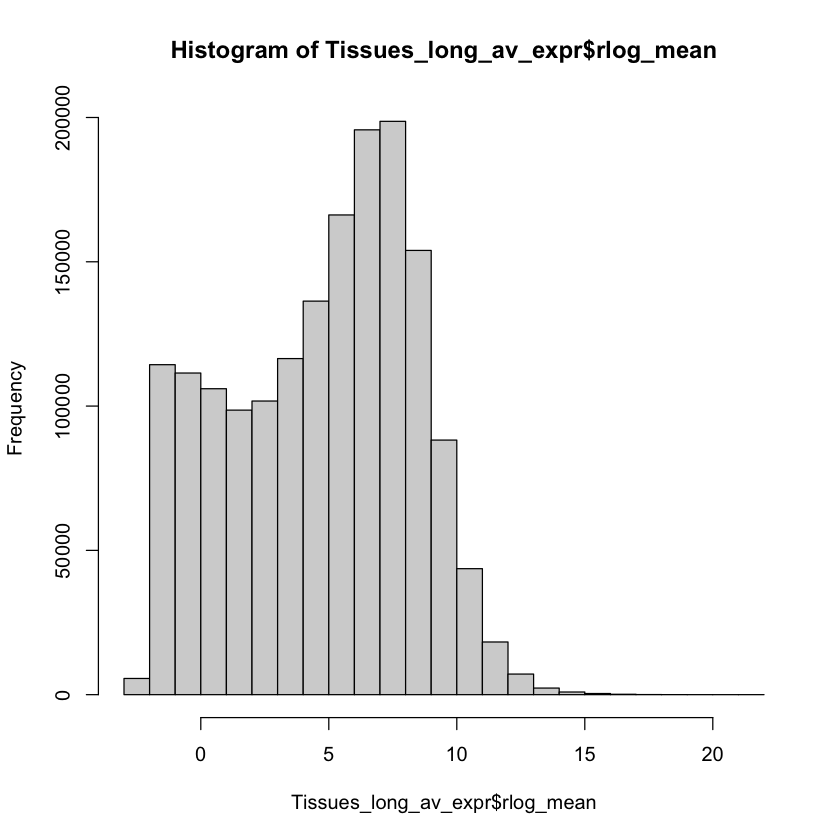

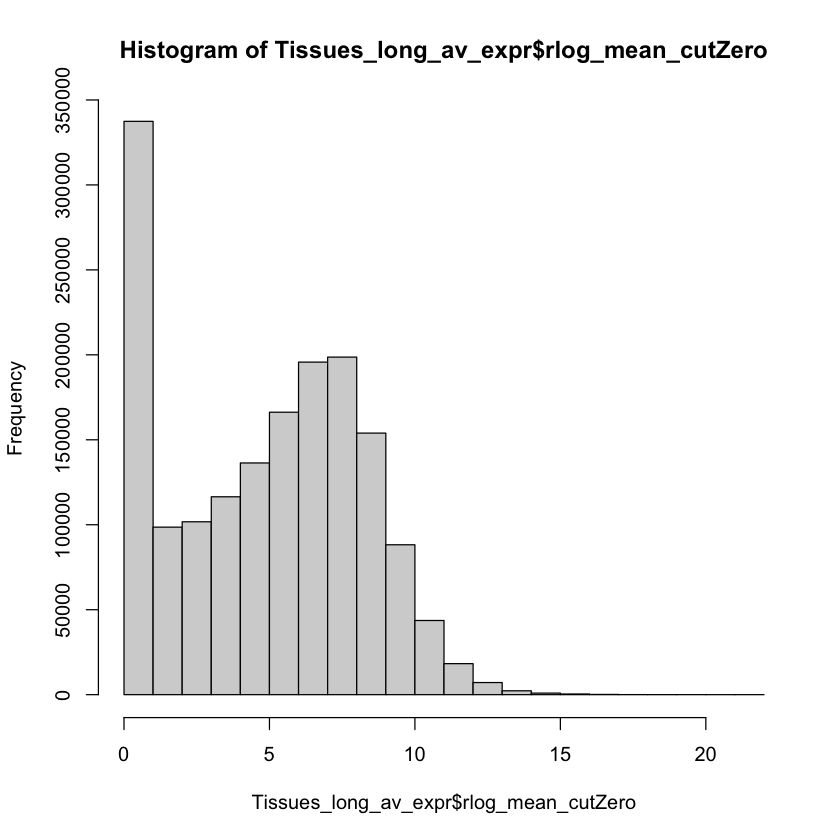

In [22]:
hist(Tissues_long_av_expr$rlog_mean)
hist(Tissues_long_av_expr$rlog_mean_cutZero)


In [23]:

# Number of tissues
#::::::::::::::::::::::
Tissues_long_av_expr %>% select(Tissue) %>% unique()
Number_of_tissues <- Tissues_long_av_expr %>% select(Tissue) %>% unique() %>% nrow()
Number_of_tissues


Tissue
<chr>
ClosedFlower
ColdLeafControl
HookedStolon
ImmFruit
MatureFruit
OpenFlower
RootControl
Sprout
StemControl


[1] 16

***NOTE**: YL is young leaf

In [24]:
# Calculate Tau
#:::::::::::::::::::
Tissues_long_Tau <- Tissues_long_av_expr %>%
                    group_by(geneID) %>% arrange(rlog_mean_cutZero) %>% 
                    reframe(Tau_0 = sum(1-(rlog_mean_cutZero/max(rlog_mean_cutZero)))/(Number_of_tissues-1),
                                 Median_expression_0 = median(rlog_mean_cutZero)
                           ) %>% unique()

In [25]:
Tissues_long_Tau[1:2,]

geneID,Tau_0,Median_expression_0
<chr>,<dbl>,<dbl>
Soltu.Atl_v3.01_0G000010.1,0.59624341,0.9810854
Soltu.Atl_v3.01_0G000020.1,0.08679617,10.0303733


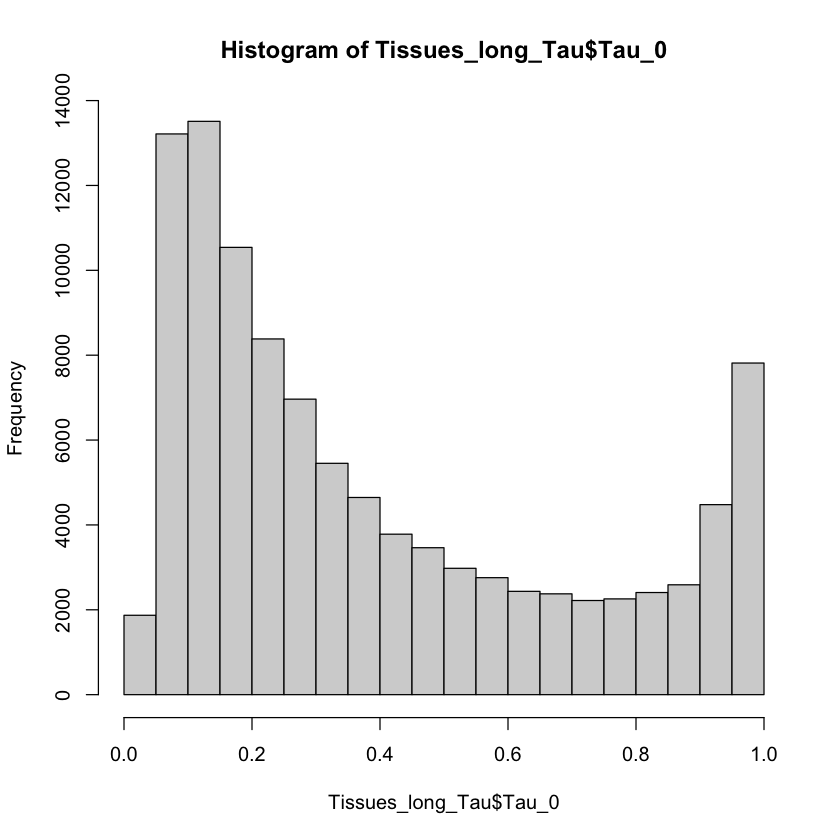

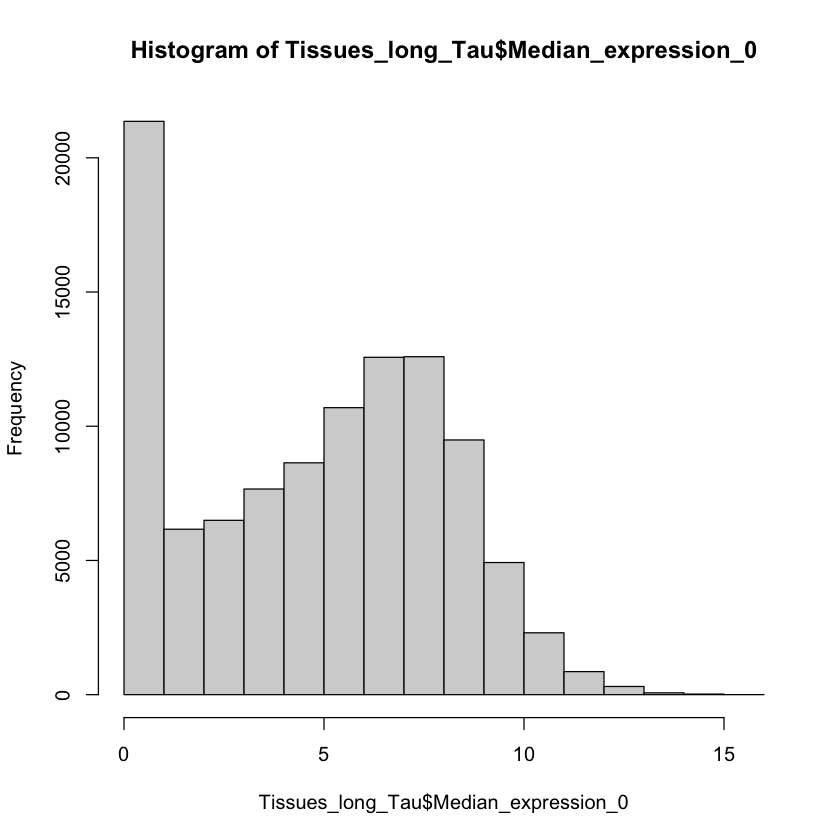

In [26]:
hist(Tissues_long_Tau$Tau_0)

hist(Tissues_long_Tau$Median_expression_0)

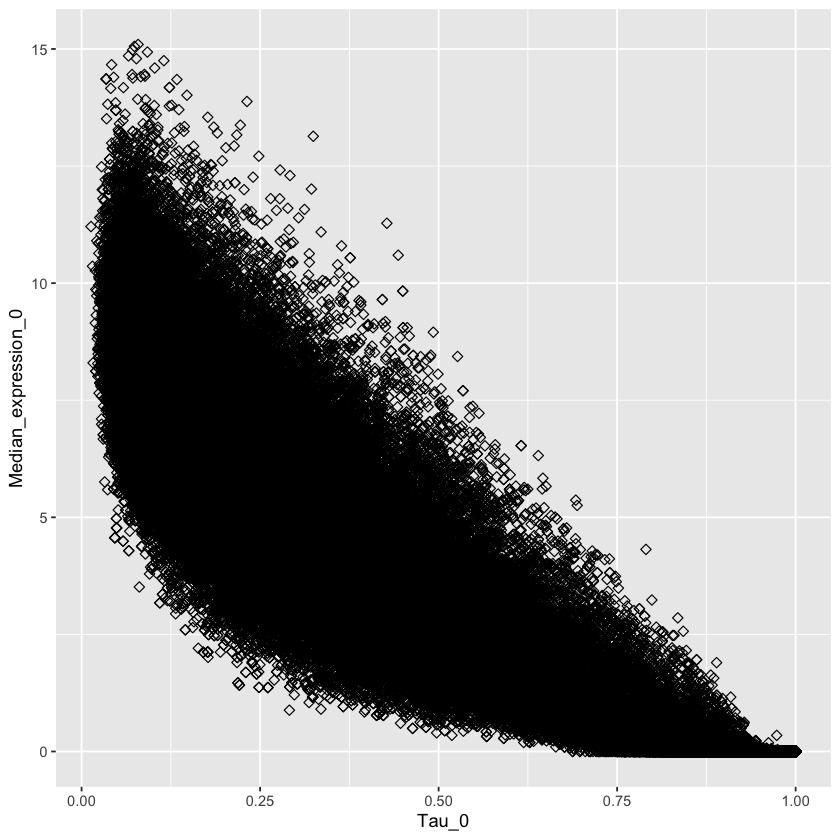

In [27]:
Tissues_long_Tau %>% 

                ggplot(aes(x=Tau_0, y=Median_expression_0)) +
                      geom_point(size=2, shape=23)

In [28]:
### Add target_id column without transcript version to be able to add cyclic gene expression data
#:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
Tissues_long_Tau<- Tissues_long_Tau %>% mutate(target_id= geneID)

## REMOVE transcript version for versions from .1-.99 

Tissues_long_Tau$target_id<-lapply(Tissues_long_Tau$target_id,
                             function (i){if (str_sub(i,-2,-2) == ".")
                                             { i<- str_sub(i, end = -3)} # i.e. the last character will be -3 position
                                          else if ((str_sub(i,-3,-3) == "."))
                                               { i<- str_sub(i, end = -4)} # i.e. the last character will be -4 position
                                        else {i<-i}
                                          
                                        })
## NOTE MAKES THE COLLUMN A LIST

Tissues_long_Tau$target_id <- as.character(Tissues_long_Tau$target_id)
Tissues_long_Tau[1:2,]

geneID,Tau_0,Median_expression_0,target_id
<chr>,<dbl>,<dbl>,<chr>
Soltu.Atl_v3.01_0G000010.1,0.59624341,0.9810854,Soltu.Atl_v3.01_0G000010
Soltu.Atl_v3.01_0G000020.1,0.08679617,10.0303733,Soltu.Atl_v3.01_0G000020


# Test for difference in tissues specific expression between rhythmic and not rhythmic genes

### Get rhythmicity data

In [29]:
SDLD<- import(file = , '../ATL_AllelicGroupRhythmicity/Results/ExpressedGenes_JTK_AllelicGroups.csv',
                                sep =',', header = TRUE, fill = TRUE )


In [30]:
SDLD[1:2,]

,Syntelog,Tissue,Condition,ATL_expressed_alleles,geneID,target_id,Average,SD,CV,ATL_alleles,BH.Q,ADJ.P,Period,Adj_phase,Amplitude
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,Synt_1,Leaf,LD,4,Soltu.Atl_v3.01_1G000020.2,Soltu.Atl_v3.01_1G000020,7.395377,0.1577245,0.01760367,4,1,1,20,19,0.10051609
2,Synt_1,Leaf,LD,4,Soltu.Atl_v3.01_2G000020.1,Soltu.Atl_v3.01_2G000020,5.948141,0.1212230,0.02942801,4,1,1,20,4,0.09175902


In [31]:
## Get only cycling information 
#:::::::::::::::::::::::::::::

SDLDcyc<- SDLD %>% select(target_id, ADJ.P, Condition, Tissue, Syntelog, geneID) %>% unique()

In [32]:
SDLDcyc[1:2,]

,target_id,ADJ.P,Condition,Tissue,Syntelog,geneID
,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,Soltu.Atl_v3.01_1G000020,1,LD,Leaf,Synt_1,Soltu.Atl_v3.01_1G000020.2
2,Soltu.Atl_v3.01_2G000020,1,LD,Leaf,Synt_1,Soltu.Atl_v3.01_2G000020.1


## Combine Tau and rhythmicity data

In [33]:

SDLDcycTau<-SDLDcyc %>% select(target_id, ADJ.P, Condition, Tissue, Syntelog, geneID) %>% 
                        left_join(Tissues_long_Tau %>% select(Tau_0, target_id, geneID),
                                  by = c('target_id','geneID'))
                                                          

In [34]:
SDLDcycTau[1:2,]

,target_id,ADJ.P,Condition,Tissue,Syntelog,geneID,Tau_0
,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,Soltu.Atl_v3.01_1G000020,1,LD,Leaf,Synt_1,Soltu.Atl_v3.01_1G000020.2,0.18333883
2,Soltu.Atl_v3.01_2G000020,1,LD,Leaf,Synt_1,Soltu.Atl_v3.01_2G000020.1,0.09380878


In [35]:
nrow(SDLDcycTau)

[1] 270850

### Plot distribution of Tau among rhythmic and not rhythmic genes

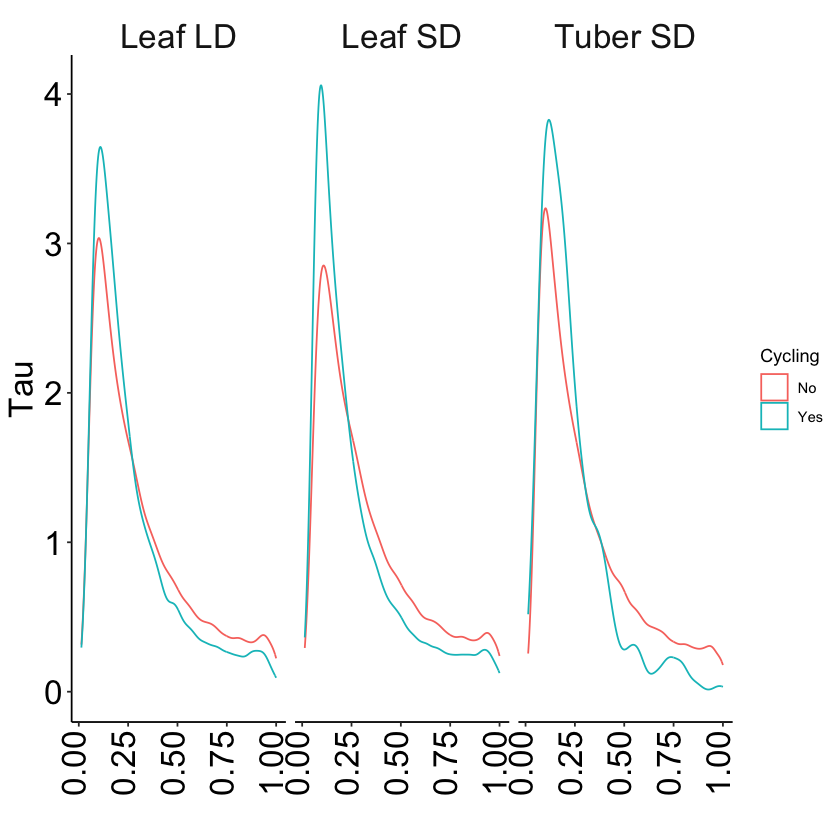

In [36]:

SDLDcycTau %>%  filter(!is.na(Tau_0))%>%
                mutate(Condition = case_when(Condition == 'LD' & Tissue == 'Leaf' ~ 'Leaf LD',
                                         Condition == 'SD' & Tissue == 'Leaf' ~ 'Leaf SD',
                                        Condition == 'SD' & Tissue == 'Tuber' ~ 'Tuber SD')) %>% 
                mutate(Cycling = case_when(ADJ.P < 0.001 ~ 'Yes',
                                         ADJ.P >= 0.001 ~ 'No')) %>% 
            mutate(Cycling = factor(Cycling, levels = c('No','Yes')))%>%
                    
                    ggplot()+
    
          geom_density(aes(x = Tau_0, color = Cycling))+
            labs(y="Tau", x="")+
          
         # coord_cartesian(ylim=c(-7.5,10))+

 theme_classic()+
            theme (
            axis.title.x = element_text(size = 20),
            axis.title.y = element_text(size = 20),
            axis.text = element_text(size = 20, color = "black"),
                 strip.text.x = element_text(size = 20),
                axis.text.x=element_text(angle=90,hjust=1,vjust = 0.3),
            strip.background = element_rect(color = "white"),
          strip.placement = "inside",
          strip.text = element_text(vjust = 0)) +
               #plot.title = element_text(size = 14)
        facet_grid(cols = vars(Condition))
                      




In [37]:
# Calculate percent of genes in each category that have a Tau value > 0.8
#:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
SDLDcycTau %>% filter(!is.na(ADJ.P), !is.na(Tau_0)) %>% 
     mutate(Condition = case_when(Condition == 'LD' & Tissue == 'Leaf' ~ 'Leaf LD',
                                         Condition == 'SD' & Tissue == 'Leaf' ~ 'Leaf SD',
                                        Condition == 'SD' & Tissue == 'Tuber' ~ 'Tuber SD')) %>% 

 mutate(Condition = as.factor(Condition))%>%
  
                                
     mutate(
                   Cycling = case_when(ADJ.P < 0.001 ~ 'Cycling',
                                         ADJ.P >= 0.001 ~ 'Not cycling')) %>% 
            ungroup() %>% 
            mutate(Cycling = factor(Cycling, levels = c('Not cycling','Cycling')))%>%
            group_by(Cycling, Condition) %>%
            summarize(PercentHigherThan08 = sum(Tau_0 > 0.8)*100/n())

`summarise()` has grouped output by 'Cycling'. You can override using the
`.groups` argument.


Cycling,Condition,PercentHigherThan08
<fct>,<fct>,<dbl>
Not cycling,Leaf LD,7.325132
Not cycling,Leaf SD,7.648350
Not cycling,Tuber SD,6.078476
Cycling,Leaf LD,4.850310
Cycling,Leaf SD,5.095348
Cycling,Tuber SD,1.206030


In [38]:
SDLDcycTau [1:2,]

,target_id,ADJ.P,Condition,Tissue,Syntelog,geneID,Tau_0
,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,Soltu.Atl_v3.01_1G000020,1,LD,Leaf,Synt_1,Soltu.Atl_v3.01_1G000020.2,0.18333883
2,Soltu.Atl_v3.01_2G000020,1,LD,Leaf,Synt_1,Soltu.Atl_v3.01_2G000020.1,0.09380878


In [39]:
# Combine leaf conditions such that a cycling gene is one that is cycling in either SD or LD
#Calculate percent of genes in each category that have a Tau value > 0.8
#::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
SDLDcycTau %>% filter(!is.na(ADJ.P), !is.na(Tau_0)) %>% filter (Tissue == 'Leaf') %>%
                group_by( target_id, Tau_0) %>%
                        reframe (Cycling = case_when(sum(ADJ.P < 0.001) >=1 ~ 'Cycling',
                                             sum(ADJ.P < 0.001) == 0 ~ 'Not cycling'))%>%

                ungroup() %>% 
            select( Cycling, Tau_0, target_id) %>% unique() %>%

            
            group_by(Cycling) %>%
            summarize(PercentHigherThan08 = sum(Tau_0 > 0.8)*100/n())

Cycling,PercentHigherThan08
<chr>,<dbl>
Cycling,5.020825
Not cycling,8.702553


## Violin plot of Tau comparing rhythmic and not rhythmic transcripts

Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”


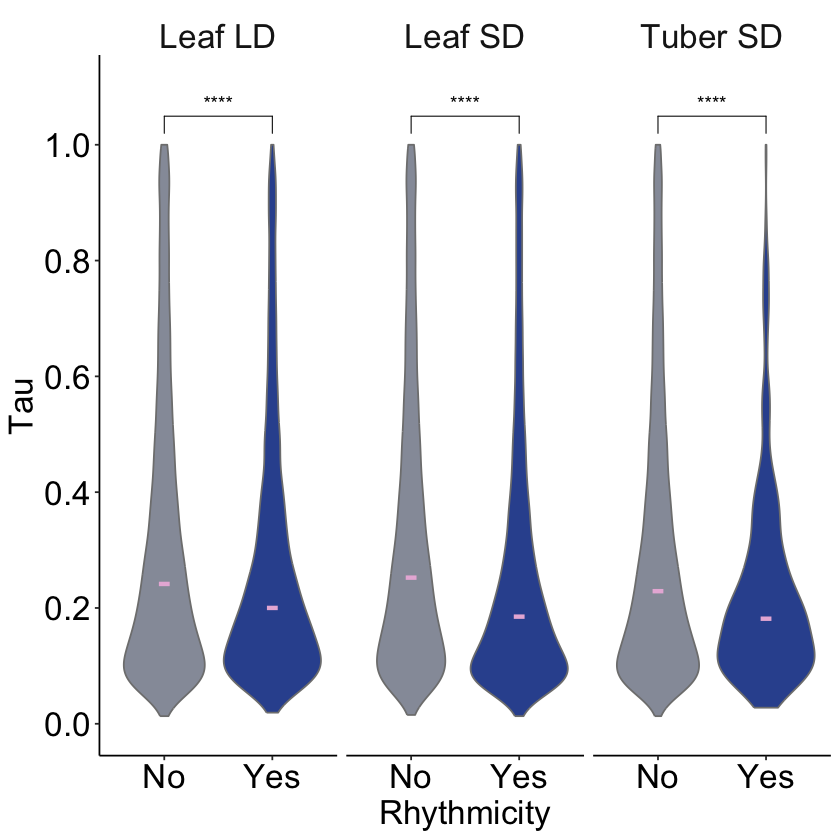

In [40]:
Tissues_Tau_violin <- SDLDcycTau %>% filter(!is.na(ADJ.P), !is.na(Tau_0)) %>% 
  
        mutate(Condition = case_when(Condition == 'LD' & Tissue == 'Leaf' ~ 'Leaf LD',
                                         Condition == 'SD' & Tissue == 'Leaf' ~ 'Leaf SD',
                                        Condition == 'SD' & Tissue == 'Tuber' ~ 'Tuber SD')) %>% 

 mutate(Condition = as.factor(Condition))%>%
                                
     mutate(
                   Cycling = case_when(ADJ.P < 0.001 ~ 'Yes',
                                         ADJ.P >= 0.001 ~ 'No')) %>% 
            ungroup() %>% 
            mutate(Cycling = factor(Cycling, levels = c('No','Yes')))%>%
                    
                    
                    ggplot(aes(x= Cycling, y = Tau_0))+
          
            geom_violin(trim=TRUE, aes(col = 'black', fill = Cycling))+
            labs(y="Tau", x="Rhythmicity")+

scale_y_continuous(breaks = seq(0,1, by=0.2))+
          
          coord_cartesian(ylim=c(0,1.1))+



stat_summary(fun = median,
               geom = "crossbar", 
               width = 0.1,
               colour = "#E8B7DA")+  

 scale_color_manual(values = c('Yes' = '#33539E', 
                                    
                                      'No' = '#969ba8'))+ 
    scale_fill_manual(values = alpha(c('Yes' = '#33539E', 
                                  
                                      'No' = '#969ba8')))+

                      
 theme_classic()+
            theme (
            axis.title.x = element_text(size = 20),
            axis.title.y = element_text(size = 20),
            axis.text = element_text(size = 20, color = "black"),
                 strip.text.x = element_text(size = 20),
               # axis.text.x=element_text(angle=90,hjust=1,vjust = 0.3),
            legend.position="none",
            strip.background = element_rect(color = "white"),
          strip.placement = "inside",
          strip.text = element_text(vjust = 0)) +
               #plot.title = element_text(size = 14)
        facet_grid(cols = vars(Condition))+
                  
        
     stat_compare_means(method = 'wilcox.test', 
                           comparisons = list(c('Yes','No')),  p.adjust.method = "BH" ,
                           size = 4,
                           label = "p.signif"
                          )

#stat_compare_means(label.y = 1)

Tissues_Tau_violin


In [41]:
## EXPORT
#::::::::::::::::::::::::::::::
Tissues_Tau_violin%>% ggsave(file="./Results/Tissues_Tau_violin_plot.pdf", 
                            width=7.25, height=5, dpi=600)

Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”


## Comparing rhythmic and not rhythmic allelic groups

In [42]:
SDLDcycTau %>% select (Condition,Tissue, Syntelog, target_id, ADJ.P, Tau_0) %>%
              filter(Syntelog !='',!is.na(ADJ.P), !is.na(Tau_0))%>% 
            unique() %>% ungroup() %>%
            mutate(Condition = case_when(Condition == 'LD' & Tissue == 'Leaf' ~ 'Leaf LD',
                                         Condition == 'SD' & Tissue == 'Leaf' ~ 'Leaf SD',
                                        Condition == 'SD' & Tissue == 'Tuber' ~ 'Tuber SD')) %>% 
            group_by (Syntelog, Condition) %>% 
            mutate (percentCycling = sum(ADJ.P<0.001)*100/n(),# used only expressed alleles
                   Cycling = case_when(percentCycling == 0 ~ 'No',
                                          percentCycling < 100 & percentCycling > 0 ~ 'Mixed',
                                        percentCycling == 100 ~ 'Full')) %>% 
            ungroup() %>% 
            mutate(Cycling = factor(Cycling, levels = c('No','Mixed', 'Full')))%>%
         group_by(Cycling, Condition) %>%
            summarize(PercentHigherThan08 = sum(Tau_0 > 0.8)*100/n())

`summarise()` has grouped output by 'Cycling'. You can override using the
`.groups` argument.


Cycling,Condition,PercentHigherThan08
<fct>,<chr>,<dbl>
No,Leaf LD,4.9818465
No,Leaf SD,5.4091107
No,Tuber SD,3.9252166
Mixed,Leaf LD,3.7093574
Mixed,Leaf SD,3.2509753
Mixed,Tuber SD,1.6640254
Full,Leaf LD,3.4700315
Full,Leaf SD,3.4943863
Full,Tuber SD,0.5154639


Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”


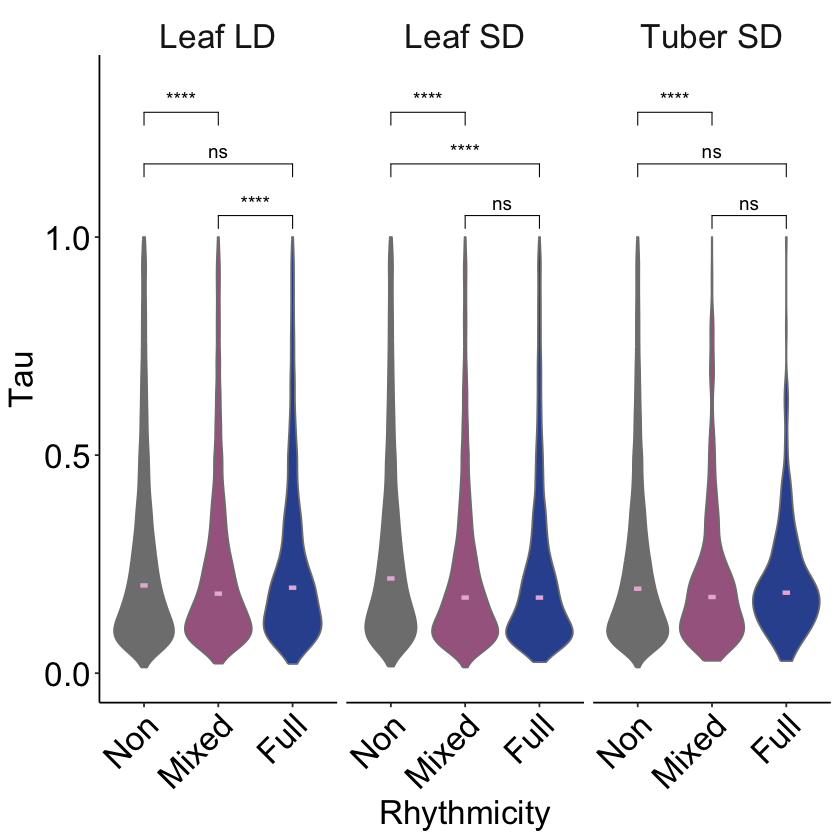

In [43]:

TauAllelicGroupCycling_plot<- SDLDcycTau %>% select (Condition,Tissue, Syntelog, target_id, ADJ.P, Tau_0) %>%
              filter(Syntelog != '',!is.na(ADJ.P), !is.na(Tau_0))%>% 
            unique() %>% ungroup() %>%
            mutate(Condition = case_when(Condition == 'LD' & Tissue == 'Leaf' ~ 'Leaf LD',
                                         Condition == 'SD' & Tissue == 'Leaf' ~ 'Leaf SD',
                                        Condition == 'SD' & Tissue == 'Tuber' ~ 'Tuber SD')) %>% 
            group_by (Syntelog, Condition) %>% 
            mutate (percentCycling = sum(ADJ.P<0.001)*100/n(),# used only expressed alleles
                   Cycling = case_when(percentCycling == 0 ~ 'Non',
                                          percentCycling < 100 & percentCycling > 0 ~ 'Mixed',
                                        percentCycling == 100 ~ 'Full')) %>% 
            ungroup() %>% 
            mutate(Cycling = factor(Cycling, levels = c('Non','Mixed', 'Full')))%>%
            
    ggplot(aes(x= Cycling, y = Tau_0, color=Cycling))+
                   
              geom_violin(trim=TRUE, aes(col = 'black', fill = Cycling))+  
              
            
                   labs(y="Tau", x="Rhythmicity")+
            
            stat_summary(fun = median,
               geom = "crossbar", 
               width = 0.1,
               colour = "#E8B7DA")+  
                   
          coord_cartesian(ylim=c(0,1.35)) +
 
         scale_color_manual(values = c('Full' = '#33539E',  ##1F449C #darker blue/grey
                                    'Mixed'= '#A5678E',   ##7CA1CC
                                      'No' = '#969ba8'))+ # blue
    scale_fill_manual(values = alpha(c('Full' = '#33539E', #darker blue/grey  '#1F449C'
                                    'Mixed'= '#A5678E',   #7CA1CC
                                      'No' = '#969ba8')))+
theme_classic()+
            theme (
            axis.title.x = element_text(size = 20),
            axis.title.y = element_text(size = 20),
            axis.text = element_text(size = 20, color = "black"),
            strip.text.x = element_text(size = 20),
            axis.text.x = element_text(angle = 45, vjust = 1, hjust=1),
            legend.position="none",
            strip.background = element_rect(color = "white"),
          strip.placement = "inside",
          strip.text = element_text(vjust = 0)) +
               #plot.title = element_text(size = 14)
        facet_grid(cols = vars(Condition))+
                
     # stat_compare_means(method= 'kruskal.test') + #Kruskal-Wallis multiple comparisons
        
        stat_compare_means(method = 'wilcox.test', ## posthoc pairwise test
                           comparisons = list(c('Full','Mixed'), c('Full', 'Non'), c('Non','Mixed')),  p.adjust.method = "BH" ,
                           size = 4,
                           label = "p.signif"
                          )
#annotate("segment",x = 'No',xend = 'Full',y = 25,yend = 25, size = 0.5)
# Adhoc pairwise comparisons p-value, show only *** for significance
      
TauAllelicGroupCycling_plot


In [44]:
## EXPORT PLOT
#::::::::::::::::::::::::::::::
TauAllelicGroupCycling_plot%>% ggsave(file="./Results/TauAllelicGroupCycling_plot.pdf", 
                            width=7.25, height=5, dpi=600)

Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”


# Are there any differences in Tau within rhythmic and not rhythmic allelic pairs?

In [45]:
#Import expresssed allelic pairs
#:::::::::::::::::::::::::::::::::

SynPairs<- import(file = '../ATL_ExpressedAllelicPairs/Results/ExpressedAllelicPairs.csv', sep =',', header = TRUE, fill = TRUE )

In [46]:
head(SynPairs)

,Syntelog,Alleles,Allele1,Allele2
,<chr>,<int>,<chr>,<chr>
1,Synt_1,4,Soltu.Atl_v3.01_1G000020.2,Soltu.Atl_v3.01_2G000020.1
2,Synt_1,4,Soltu.Atl_v3.01_1G000020.2,Soltu.Atl_v3.01_3G000040.1
3,Synt_1,4,Soltu.Atl_v3.01_1G000020.2,Soltu.Atl_v3.01_4G000020.2
4,Synt_1,4,Soltu.Atl_v3.01_2G000020.1,Soltu.Atl_v3.01_3G000040.1
5,Synt_1,4,Soltu.Atl_v3.01_2G000020.1,Soltu.Atl_v3.01_4G000020.2
6,Synt_1,4,Soltu.Atl_v3.01_3G000040.1,Soltu.Atl_v3.01_4G000020.2


In [47]:
# Add allelic Pair ID
#::::::::::::::::::::
SynPairs<- SynPairs %>% mutate(PairID=row_number())
SynPairs[1:2,]

,Syntelog,Alleles,Allele1,Allele2,PairID
,<chr>,<int>,<chr>,<chr>,<int>
1,Synt_1,4,Soltu.Atl_v3.01_1G000020.2,Soltu.Atl_v3.01_2G000020.1,1
2,Synt_1,4,Soltu.Atl_v3.01_1G000020.2,Soltu.Atl_v3.01_3G000040.1,2


### Get Tau and cycling data

In [48]:
SDLDcycTau[1:2,]

,target_id,ADJ.P,Condition,Tissue,Syntelog,geneID,Tau_0
,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,Soltu.Atl_v3.01_1G000020,1,LD,Leaf,Synt_1,Soltu.Atl_v3.01_1G000020.2,0.18333883
2,Soltu.Atl_v3.01_2G000020,1,LD,Leaf,Synt_1,Soltu.Atl_v3.01_2G000020.1,0.09380878


In [49]:
SDLDcycTau_YN <- SDLDcycTau %>% select(Condition,geneID, ADJ.P, Tau_0, Tissue,Syntelog) %>%
                    filter(Syntelog!='',!is.na(ADJ.P))%>% 
            unique() %>% 
            mutate(Condition = case_when(Condition == 'LD' & Tissue == 'Leaf' ~ 'Leaf LD',
                                         Condition == 'SD' & Tissue == 'Leaf' ~ 'Leaf SD',
                                        Condition == 'SD' & Tissue == 'Tuber' ~ 'Tuber SD')) %>% 


            mutate (Cycling = case_when(ADJ.P < 0.001 ~ 'Yes',
                                      ADJ.P >= 0.001 ~ 'No')) %>% 
      mutate(Cycling = as.factor(Cycling))%>%
        mutate(Cycling = factor(Cycling, levels=c("No", "Yes"))) %>%
        mutate(Condition = as.factor(Condition))%>%
        mutate(Condition = factor(Condition, levels=c( "Leaf LD","Leaf SD", 'Tuber SD'))) %>%        
        select(Condition, geneID, Cycling, Tau_0)



In [50]:
SDLDcycTau_YN[1:2,]

,Condition,geneID,Cycling,Tau_0
,<fct>,<chr>,<fct>,<dbl>
1,Leaf LD,Soltu.Atl_v3.01_1G000020.2,No,0.18333883
2,Leaf LD,Soltu.Atl_v3.01_2G000020.1,No,0.09380878


In [51]:
SynPairsTau<-SynPairs %>% left_join(SDLDcycTau_YN, c('Allele1'='geneID'), relationship = 'many-to-many') %>%
                                       rename(
                                             'Cycling1' = 'Cycling',
                                             'Tau1' = 'Tau_0') %>%
                                    left_join(SDLDcycTau_YN, c('Allele2'='geneID', 'Condition' = 'Condition'), relationship = 'many-to-many') %>%
                                       rename(
                                             'Cycling2' = 'Cycling',
                                             'Tau2' = 'Tau_0')

                                          
SynPairsTau[1:2,]

,Syntelog,Alleles,Allele1,Allele2,PairID,Condition,Cycling1,Tau1,Cycling2,Tau2
,<chr>,<int>,<chr>,<chr>,<int>,<fct>,<fct>,<dbl>,<fct>,<dbl>
1,Synt_1,4,Soltu.Atl_v3.01_1G000020.2,Soltu.Atl_v3.01_2G000020.1,1,Leaf LD,No,0.1833388,No,0.09380878
2,Synt_1,4,Soltu.Atl_v3.01_1G000020.2,Soltu.Atl_v3.01_2G000020.1,1,Leaf SD,Yes,0.1833388,No,0.09380878


In [52]:
SynPairsTau<-SynPairsTau %>% select(PairID, Condition, Cycling1, Tau1, Cycling2, Tau2) %>% filter(Cycling1 != Cycling2)
SynPairsTau[1:3,]

,PairID,Condition,Cycling1,Tau1,Cycling2,Tau2
,<int>,<fct>,<fct>,<dbl>,<fct>,<dbl>
1,1,Leaf SD,Yes,0.1833388,No,0.09380878
2,2,Leaf SD,Yes,0.1833388,No,0.23208795
3,3,Leaf SD,Yes,0.1833388,No,0.36324777


In [53]:
H2 <- SynPairsTau %>% select(PairID, Condition, Cycling2, Tau2) %>% rename(Cycling = Cycling2,
                                                                                     Tau = Tau2)
H1<- SynPairsTau %>% select(PairID, Condition, Cycling1, Tau1) %>% rename(Cycling = Cycling1,
                                                                                     Tau = Tau1)
SynPairCycTau <- H1 %>% rbind(H2)

In [54]:
SynPairCycTau_w <-SynPairCycTau %>% pivot_wider(names_from = Cycling, values_from=Tau)
SynPairCycTau_w[1:2,]

PairID,Condition,Yes,No
<int>,<fct>,<dbl>,<dbl>
1,Leaf SD,0.1833388,0.09380878
2,Leaf SD,0.1833388,0.23208795


In [55]:
TauCycling_AllelicPairs<-  SynPairCycTau_w %>% filter(!is.na(Yes), !is.na(No)) %>%
        ggpaired( cond1 = 'Yes', cond2 = 'No',
         color = 'condition', line.color = "gray", line.size = 0.1,
         palette = "jco")+
             
            labs(y="Tau", x="Rhythmicity")+

      
           theme_classic()+
            theme (
            axis.title.x = element_text(size = 20),
            axis.title.y = element_text(size = 20),
            axis.text = element_text(size = 20, color = "black"),
                 strip.text.x = element_text(size = 20),
            legend.position="none",
            strip.background = element_rect(color = "white"),
          strip.placement = "inside",
          strip.text = element_text(vjust = 0)) +
               
        facet_grid(cols = vars(Condition))+
                  
        
     stat_compare_means(method = 'wilcox.test', ##  pairwise test
                           comparisons = list(c('No','Yes')),  p.adjust.method = "BH" ,
                           size = 4,
                           label = "p.signif"
                          )

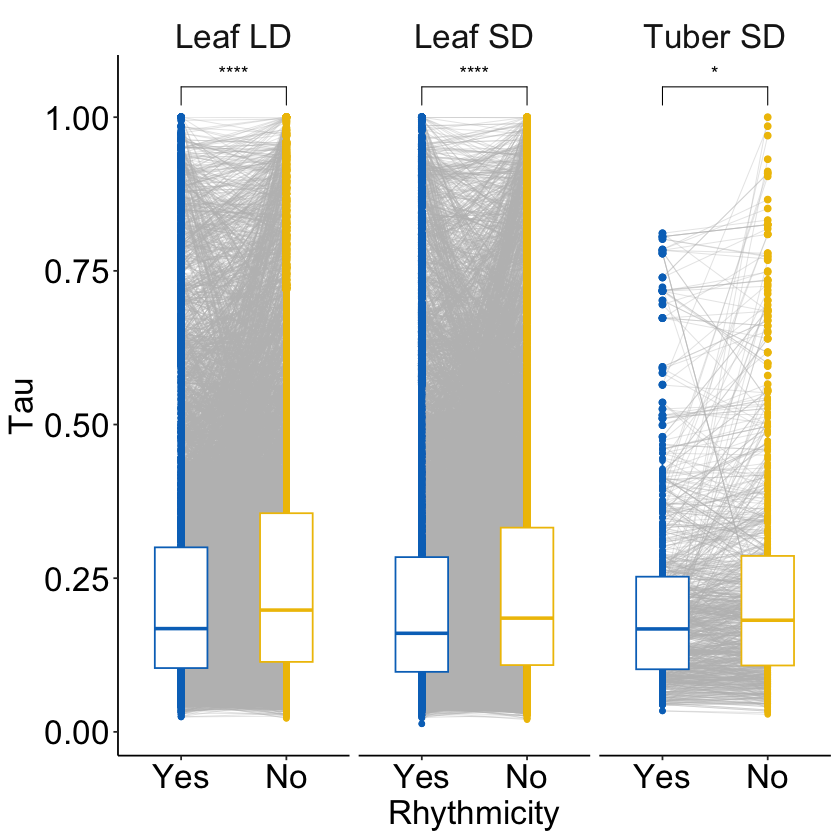

In [56]:
box<- TauCycling_AllelicPairs$layers[1]
lines<- TauCycling_AllelicPairs$layers[2]
points<- TauCycling_AllelicPairs$layers[3]

TauCycling_AllelicPairs$layers[1] <- lines
TauCycling_AllelicPairs$layers[2] <- points
TauCycling_AllelicPairs$layers[3] <- box
TauCycling_AllelicPairs


In [57]:
## EXPORT PLOT
#::::::::::::::::::::::::::::::
TauCycling_AllelicPairs%>% ggsave(file="./Results/TauCycling_AllelicPairs_plot.pdf", 
                            width=7.25, height=5, dpi=600)